In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Modeling of carbon cycle
## 1.1 Equation 1-2 (without the buffer effect)

In [2]:
# 加载所需的数据（年平均），从第44行数据开始读取（1-43行为数据来源信息）
data_mean= pd.read_csv(r"D:\ESE5023\HW 5_Data\co2_annmean_mlo.csv",header=43)
# 筛选出对应年份数据（1986-2004），并重新设置索引
data_mean=data_mean[(data_mean['year']>1985)&(data_mean['year']<2005)].reset_index(drop=True)
# 取前2列
data_mean=data_mean.iloc[:,:2]

In [3]:
# 加载所需的数据（C排放），筛选掉数据来源行（第0行）
data1= pd.read_csv(r"D:\ESE5023\HW 5_Data\CSV-FILES\global.1751_2008.csv")
data1=data1.drop([0])
# 将年份、平均排放2列str格式转为int格式，方便后续筛选与计算
data1['Year"']=data1['Year"'].astype('int')
data1['Total carbon emissions from fossil-fuels (million metric tons of C)']=data1['Total carbon emissions from fossil-fuels (million metric tons of C)'].astype('int')
# 筛选出对应年份数据（1986-2004），并重新设置索引
data1=data1[(data1['Year"']>1985)&(data1['Year"']<2005)].reset_index(drop=True)
# 取原数据前2列，新增2列“N1-1”“N2-1”
co2=data1.iloc[:,:2]
# 合并mean和emissions表格，并删掉重复数据列（年份）
co2=pd.concat([data_mean,co2],axis=1).drop(['Year"'], axis=1)
# 修改列名
co2=co2.rename(columns={'Total carbon emissions from fossil-fuels (million metric tons of C)':'Carbon emissions(ppm)'})
# 将million metric tons 换算为ppm（1MT=0.001Pg，再除以2.13换算为ppm）
co2['Carbon emissions(ppm)']=co2['Carbon emissions(ppm)']/1000/2.13

In [4]:
# 增加2列"N1-1""N2-1"
co2.insert(co2.shape[1],'N1-1.1',None)
co2.insert(co2.shape[1],'N2-1.1',None)
# 计算1987年N1和N2（数字索引）
k12=105/740
k21=102/900
N1=740/2.13
N2=900/2.13
co2.iloc[1,3] = -k12*N1+k21*N2+co2.iloc[0,2]+N1
co2.iloc[1,4] =  k12*N1-k21*N2+N2
# 计算1988-2004年N1和N2（数字索引）
for i in range(2,19):
    co2.iloc[i,3] = -k12*co2.iloc[i-1,3]+k21*co2.iloc[i-1,4]+co2.iloc[i,2]+co2.iloc[i-1,3]
    co2.iloc[i,4] =  k12*co2.iloc[i-1,3]-k21*co2.iloc[i-1,4]+co2.iloc[i-1,4]

In [5]:
co2

,year,mean,Carbon emissions(ppm),N1-1.1,N2-1.1
0,1986,347.61,2.633333,None,None
1,1987,349.31,2.701878,348.642723,423.943662
2,1988,351.69,2.801878,350.021974,425.366289
3,1989,353.20,2.858216,351.423089,426.82339
4,1990,354.45,2.887793,352.820113,428.314159
5,1991,355.70,2.929108,354.229179,429.834201
6,1992,356.54,2.900469,355.581943,431.381907
7,1993,357.21,2.897653,356.91535,432.946152
8,1994,358.96,2.950235,358.289421,434.522316
9,1995,360.97,3.015023,359.711943,436.114817


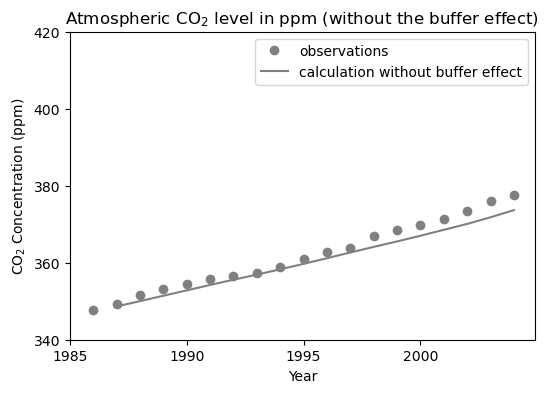

In [6]:
# 数据绘图
fig,ax = plt.subplots(figsize=(6,4))
plt.plot(co2['year'],co2['mean'],'o',color='grey',label='observations')
plt.plot(co2['year'],co2['N1-1.1'],color='grey',label='calculation without buffer effect')
# 添加xy轴标题
plt.xlabel('Year')
plt.ylabel('CO$_{2}$ Concentration (ppm)')
# 调整xy坐标轴
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420])
# 添加标题
plt.title('Atmospheric CO$_{2}$ level in ppm (without the buffer effect)')
# 绘图
plt.legend()
plt.show()

## 1.2 Equation 3-4 (with the buffer effect)

In [7]:
# 增加2列"N1-1""N2-1"
co2.insert(co2.shape[1],'N1-1.2',None)
co2.insert(co2.shape[1],'N2-1.2',None)

In [18]:
# 计算1987年N1和N2（数字索引）
k12=105/740
k21=102/900
N1=740/2.13
N2=900/2.13
N2_0=821/2.13
buffer_factor=3.69+1.86*0.01*N1-1.80*0.000001*N1*N1
co2.iloc[1,5] = -k12*N1+k21*(N2_0+buffer_factor*(N2-N2_0))+co2.iloc[1,2]+N1
co2.iloc[1,6] =  k12*N1-k21*(N2_0+buffer_factor*(N2-N2_0))+N2
# 计算1988-2004年N1和N2（数字索引）
for i in range(2,19):
    N1=co2.iloc[i-1,5]
    N2=co2.iloc[i-1,6]
    buffer_factor=3.69+1.86*0.01*N1-1.80*0.000001*N1*N1
    co2.iloc[i,5] = -k12*N1+k21*(N2_0+buffer_factor*(N2-N2_0))+co2.iloc[i,2]+N1
    co2.iloc[i,6] =  k12*N1-k21*(N2_0+buffer_factor*(N2-N2_0))+N2

In [19]:
co2

,year,mean,Carbon emissions(ppm),N1-1.1,N2-1.1,N1-1.2,N2-1.2
0,1986,347.61,2.633333,None,None,None,None
1,1987,349.31,2.701878,348.642723,423.943662,386.267825,386.387105
2,1988,351.69,2.801878,350.021974,425.366289,379.076522,396.380285
3,1989,353.20,2.858216,351.423089,426.82339,384.820421,393.494602
4,1990,354.45,2.887793,352.820113,428.314159,386.441004,394.761813
5,1991,355.70,2.929108,354.229179,429.834201,389.422032,394.709893
6,1992,356.54,2.900469,355.581943,431.381907,391.942855,395.089539
7,1993,357.21,2.897653,356.91535,432.946152,394.609222,395.320825
8,1994,358.96,2.950235,358.289421,434.522316,397.281681,395.598601
9,1995,360.97,3.015023,359.711943,436.114817,400.030946,395.864359


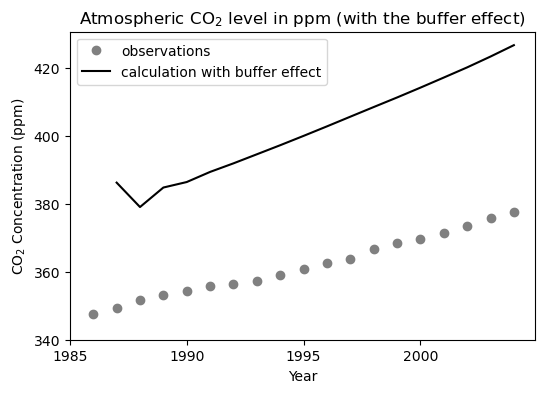

In [12]:
# 数据绘图
fig,ax = plt.subplots(figsize=(6,4))
plt.plot(co2['year'],co2['mean'],'o',color='grey',label='observations')
plt.plot(co2['year'],co2['N1-1.2'],'k',label='calculation with buffer effect')
# 添加xy轴标题
plt.xlabel('Year')
plt.ylabel('CO$_{2}$ Concentration (ppm)')
# 调整xy坐标轴
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420])
# 添加标题
plt.title('Atmospheric CO$_{2}$ level in ppm (with the buffer effect)')
# 绘图
plt.legend()
plt.show()

## 1.3 Reproduce Figure 2

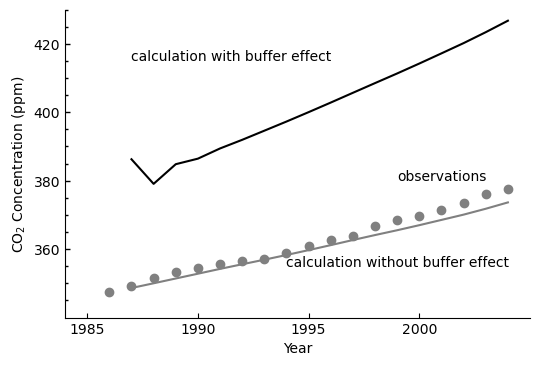

In [13]:
# 数据绘图
fig,ax = plt.subplots(figsize=(6,4))
plt.plot(co2['year'],co2['mean'],'o',color='grey')
plt.plot(co2['year'],co2['N1-1.1'],color='grey')
plt.plot(co2['year'],co2['N1-1.2'],'k')
# 添加xy轴标题
plt.xlabel('Year')
plt.ylabel('CO$_{2}$ Concentration (ppm)')
# 调整xy坐标轴
plt.xlim(1984,2005)
plt.ylim(340,430)
plt.xticks([1985,1990,1995,2000])
plt.yticks([360,380,400,420])
# 调整minor tick
ax.tick_params(axis='y',which='major',direction='in',width=1,length=3.5)
ax.tick_params(axis='y',which='minor',direction='in',width=1,length=2)
ax.tick_params(axis='x',which='major',direction='in')
ax.tick_params(axis='x',which='minor',color='none')
ax.minorticks_on()
# 添加数据的text
plt.text(1987,415,'calculation with buffer effect')
plt.text(1994,355,'calculation without buffer effect')
plt.text(1999,380,'observations')
# 隐藏右侧和上面的图脊
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')
# 绘图
plt.show()